In [ ]:
!pip install pandas xgboost scikit-learn

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('standardized_data.csv')

print(data.head())

    ID  No_Pation       AGE      Urea        Cr     HbA1c      Chol        TG  \
0  502      17975 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
1  735      34221 -3.130017 -0.212954 -0.115804 -1.334983 -0.893730 -0.678063   
2  420      47975 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
3  680      87656 -0.401144 -0.144781 -0.382672 -1.334983 -0.509436 -1.035084   
4  504      34223 -2.334096  0.673299 -0.382672 -1.334983  0.028576 -0.963680   

        HDL       LDL      VLDL       BMI  Gender_M  Gender_f CLASS  
0  1.810756 -1.085457 -0.369958 -1.124622         0         0     N  
1 -0.158692 -0.457398 -0.342649 -1.326239         1         0     N  
2  1.810756 -1.085457 -0.369958 -1.124622         0         0     N  
3  1.810756 -1.085457 -0.369958 -1.124622         0         0     N  
4 -0.613180 -0.547121 -0.397267 -1.729472         1         0     N  


In [ ]:
# Features and target variables
X = data.drop(columns=['ID', 'CLASS'])
data['CLASS'] = data['CLASS'].map({'N': 0, 'P': 1, 'Y': 2})
y = data['CLASS']

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check for missing values
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [ ]:
# Create DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters

params = {
    'objective': 'multi:softmax', 
    'num_class': 3,                 
    'eval_metric': 'mlogloss', 
    'eta': 0.1,
    'max_depth': 3,
    'seed': 42
}

#Train model
model = xgb.train(params, dtrain, num_boost_round=100)

In [ ]:
# Make predictions
y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



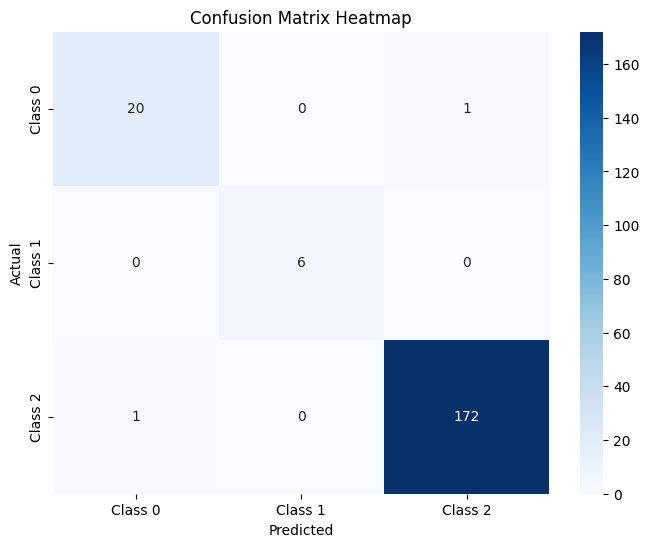

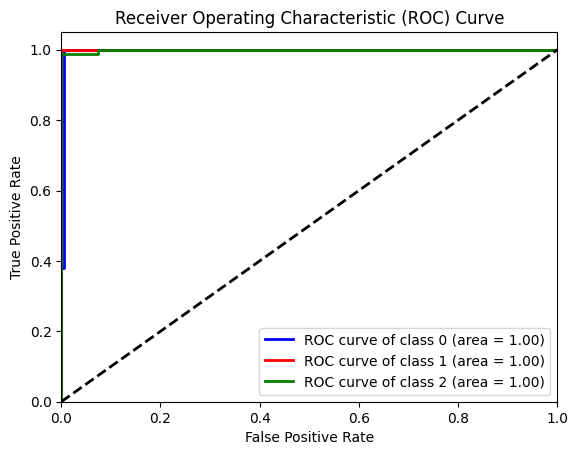

AUC for class 0: 1.00
AUC for class 1: 1.00
AUC for class 2: 1.00


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Draw a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate ROC curve and AUC value
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = model.predict(dtest, output_margin=True)

# Calculate the ROC curve and AUC value for each category
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Draw ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC value for each category
for i in range(3):
    print(f'AUC for class {i}: {roc_auc[i]:.2f}')